In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Arquivo de contigs gerado pelo Mummer

In [8]:
contigs = pd.read_csv("RN07RCABHI_alinhamento_coords.csv", sep=";")
contigs.head(3)

,[S1],[E1],[S2],[E2],[LEN 1],[LEN 2],[% IDY],[LEN R],[LEN Q],[COV R],[COV Q],[TAGS]
0,1,16024,16024,1,16024,16024,99.99,2032743,392207,0.79,4.09,CP051004.1
1,27138,91033,63896,1,63896,63896,100.00,2032743,63896,3.14,100.00,CP051004.1
2,97293,164724,1,67432,67432,67432,99.99,2032743,67432,3.32,100.00,CP051004.1


### Tratamento do arquivo

In [9]:
# Criar a coluna Contig com fatores invertidos (opcional, só para identificação)
contigs["Contig"] = range(len(contigs), 0, -1)

# Pega o menor e o maior entre [S1] e [E1], linha a linha
contigs["start"] = contigs[["[S1]", "[E1]"]].min(axis=1).astype(int)
contigs["end"] = contigs[["[S1]", "[E1]"]].max(axis=1).astype(int)

# Criar dataframe de gaps entre contigs
gaps = pd.DataFrame({
    "start": contigs["end"].iloc[:-1].values + 1,
    "end": contigs["start"].iloc[1:].values - 1
})

# Filtrar apenas os gaps válidos
gaps = gaps[gaps["start"] < gaps["end"]]

# Cálculo de total e percentual de gaps (em relação a um genoma de 5.5Mb, por exemplo)
total_gap = gaps["end"].sum() - gaps["start"].sum()
percent_gap = round((total_gap / 5500000) * 100, 2)

### Criação da figura

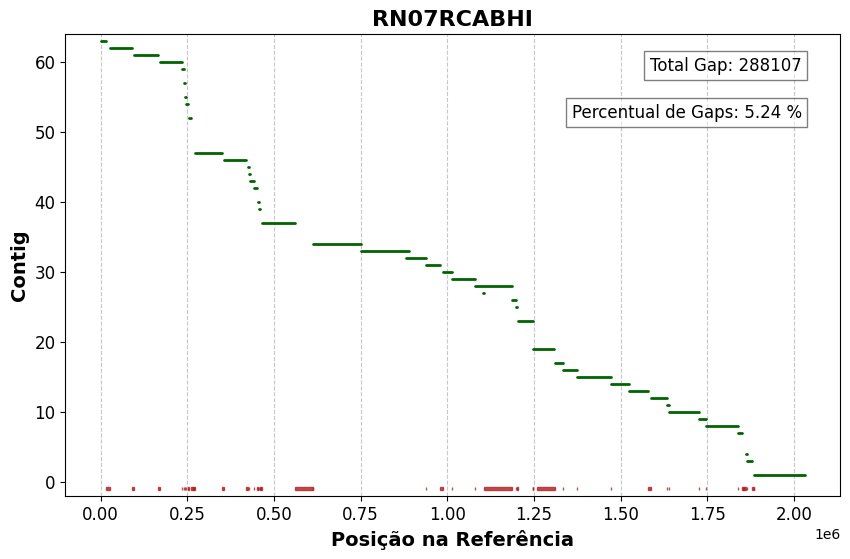

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar segmentos dos contigs
for _, row in contigs.iterrows():
    ax.plot([row["start"], row["end"]], [row["Contig"], row["Contig"]],
            linewidth=2, color='darkgreen', solid_capstyle='round')

# Plotar gaps como retângulos
for _, row in gaps.iterrows():
    ax.add_patch(plt.Rectangle((row["start"], -1.2), row["end"] - row["start"], 0.4, 
                               color='firebrick', alpha=0.8))

# Configurações do gráfico
ax.set_title("RN07RCABHI", fontsize=16, fontweight='bold')
ax.set_xlabel("Posição na Referência", fontsize=14, fontweight='bold')
ax.set_ylabel("Contig", fontsize=14, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.set_ylim(-2, len(contigs) + 1)

# Adicionar texto com o total dos gaps
ax.text(0.95, 0.95, f"Total Gap: {total_gap}", transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

ax.text(0.95, 0.85, f"Percentual de Gaps: {percent_gap} %", transform=ax.transAxes, fontsize=12,
        verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

# Salvar a figura como PNG
plt.savefig("RN07RCABHI.png", dpi=600, bbox_inches='tight', format='png')
plt.show()